In [1]:
# OpenCV ve opencv_contrib modüllerini indirin
!wget -O opencv.zip https://github.com/opencv/opencv/archive/4.x.zip
!wget -O opencv_contrib.zip https://github.com/opencv/opencv_contrib/archive/4.x.zip
!unzip opencv.zip
!unzip opencv_contrib.zip


Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: opencv-4.x/samples/cpp/tutorial_code/objectDetection/tutorial_dict.yml  
   creating: opencv-4.x/samples/cpp/tutorial_code/photo/
   creating: opencv-4.x/samples/cpp/tutorial_code/photo/decolorization/
  inflating: opencv-4.x/samples/cpp/tutorial_code/photo/decolorization/decolor.cpp  
   creating: opencv-4.x/samples/cpp/tutorial_code/photo/hdr_imaging/
  inflating: opencv-4.x/samples/cpp/tutorial_code/photo/hdr_imaging/hdr_imaging.cpp  
   creating: opencv-4.x/samples/cpp/tutorial_code/photo/non_photorealistic_rendering/
  inflating: opencv-4.x/samples/cpp/tutorial_code/photo/non_photorealistic_rendering/npr_demo.cpp  
   creating: opencv-4.x/samples/cpp/tutorial_code/photo/seamless_cloning/
  inflating: opencv-4.x/samples/cpp/tutorial_code/photo/seamless_cloning/cloning_demo.cpp  
  inflating: opencv-4.x/samples/cpp/tutorial_code/photo/seamless_cloning/cloning_gui.cpp  
   creating: opencv-4.x/samples/cpp/tutorial_code/snipp

In [2]:
!apt-get update
!apt-get install -y build-essential cmake git pkg-config libgtk-3-dev libavcodec-dev libavformat-dev libswscale-dev
!apt-get install -y python3-dev python3-numpy libtbb2 libtbb-dev libjpeg-dev libpng-dev libtiff-dev libdc1394-22-dev
!apt-get install -y build-essential cmake git pkg-config libgtk-3-dev libavcodec-dev libavformat-dev libswscale-dev libv4l-dev libxvidcore-dev libx264-dev libjpeg-dev libpng-dev libtiff-dev gfortran openexr libatlas-base-dev python3-dev python3-numpy libtbb2 libtbb-dev libdc1394-22-dev
!pip install opencv-python opencv-contrib-python scikit-image imutils


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [973 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,409 kB]
Get:13 http://archive.ubuntu

In [3]:
%cd /content/opencv-4.x/
!mkdir build
%cd build
!cmake -D CMAKE_BUILD_TYPE=Release -D CMAKE_INSTALL_PREFIX=/usr/local -D OPENCV_EXTRA_MODULES_PATH=../../opencv_contrib-4.x/modules -D OPENCV_ENABLE_NONFREE=ON ..
!make -j8
!make install


/content/opencv-4.x
/content/opencv-4.x/build
-- The CXX compiler identification is GNU 11.4.0
-- The C compiler identification is GNU 11.4.0
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- ocv_init_download: OpenCV source tree is not fetched as git repository. 3rdparty resources will be downloaded from github.com by default.
-- Detected processor: x86_64
-- Found PythonInterp: /usr/bin/python3 (found suitable version "3.10.12", minimum required is "3.2") 
-- Found PythonLibs: /usr/lib/x86_64-linux-gnu/libpython3.10.so (found suitable exact version "3.10.12") 
-- Looking for ccache - not found
-- Performing Test HAVE_CXX_FSIGNED

In [4]:
!pip install opencv-python
!pip install opencv-contrib-python


In [6]:
!pip install filterpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110458 sha256=3bf9930213c2ad8cd9ab98024587f32923c1fabae61a8fe94afd71455e376fda
  Stored in directory: /root/.cache/pip/wheels/0f/0c/ea/218f266af4ad626897562199fbbcba521b8497303200186102
Successfully built filterpy


In [11]:
# Cell 1: Giriş ve Kütüphanelerin Yüklenmesi
import os
import cv2
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error

print("Gerekli kütüphaneler yüklendi.")

Gerekli kütüphaneler yüklendi.


In [13]:
!pip install opencv-python opencv-contrib-python scikit-image imutils

In [23]:
import zipfile
import os

# Dosyanın zip formatında olup olmadığını kontrol edin
zip_file_path = '/content/rice+leaf+diseases.zip'

if zipfile.is_zipfile(zip_file_path):
    # Zip dosyasını çıkartma
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall('/content/rice_leaf_diseases')
    print("Zip dosyası başarıyla çıkartıldı.")
else:
    print("Dosya bir zip dosyası değil.")

Zip dosyası başarıyla çıkartıldı.


In [39]:
import cv2
import numpy as np

# Örnek veri yolları
image1_path = '/content/rice_leaf_diseases/Brown spot/DSC_0113.jpg'
image2_path = '/content/rice_leaf_diseases/Brown spot/DSC_0113.jpg'

# Görüntülerin yüklenmesi
image1 = cv2.imread(image1_path)
image2 = cv2.imread(image2_path)

# Yüklenen görüntüleri kontrol edin
if image1 is None or image2 is None:
    print("Görüntüler yüklenemedi. Dosya yollarını kontrol edin.")
else:
    print("Görüntüler başarıyla yüklendi.")


Görüntüler başarıyla yüklendi.


In [40]:
# Cell 1: Giriş ve Kütüphanelerin Yüklenmesi
import os
import cv2
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error

print("Gerekli kütüphaneler yüklendi.")

Gerekli kütüphaneler yüklendi.


In [41]:
# Cell 2: Veri Seti ve Ön İşleme
class RiceLeafDataset(Dataset):
    def __init__(self, img_dir, transform=None):
        self.img_dir = img_dir
        self.transform = transform
        self.img_labels = []

        self.classes = os.listdir(img_dir)
        self.classes.sort()  # Sınıf etiketlerini sıralamak (0, 1, 2 olarak)

        for class_idx, class_name in enumerate(self.classes):
            class_path = os.path.join(img_dir, class_name)
            if os.path.isdir(class_path):
                for file_name in os.listdir(class_path):
                    self.img_labels.append((os.path.join(class_path, file_name), class_idx))

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path, label = self.img_labels[idx]
        image = cv2.imread(img_path)
        if image is None:
            raise FileNotFoundError(f"Image not found at path: {img_path}")
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if self.transform:
            image = self.transform(image)
        return image, label

transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((256, 256)),  # Tüm görüntüleri 256x256 boyutuna ölçekle
    transforms.ToTensor()
])

dataset = RiceLeafDataset(img_dir='rice_leaf_diseases', transform=transform)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print("Veri seti yüklendi ve ön işlendi.")


Veri seti yüklendi ve ön işlendi.


In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern

print("Gerekli kütüphaneler yüklendi.")

Gerekli kütüphaneler yüklendi.


In [43]:
import os

# Belirtilen dizindeki dosyaların listelenmesi
img_dir = 'rice_leaf_diseases/Bacterial leaf blight'
files = os.listdir(img_dir)
print(files)

['DSC_0379.JPG', 'DSC_0366.jpg', 'DSC_0374.JPG', 'DSC_0365.JPG', 'DSC_0373.JPG', 'DSC_0396.JPG', 'DSC_0398.JPG', 'DSC_0380.JPG', 'DSC_0392.JPG', 'DSC_0367.JPG', 'DSC_0372.JPG', 'DSC_0702.jpg', 'DSC_0376.JPG', 'DSC_0703.JPG', 'DSC_0404.JPG', 'DSC_0397.JPG', 'DSC_0388.JPG', 'DSC_0381.JPG', 'DSC_0385.jpg', 'DSC_0383.JPG', 'DSC_0390.JPG', 'DSC_0405.JPG', 'DSC_0370.jpg', 'DSC_0402.JPG', 'DSC_0399.JPG', 'DSC_0389.JPG', 'DSC_0400.JPG', 'DSC_0375.JPG', 'DSC_0393.JPG', 'DSC_0378.JPG', 'DSC_0701.jpg', 'DSC_0384.JPG', 'DSC_0377.JPG', 'DSC_0382.JPG', 'DSC_0700.jpg', 'DSC_0395.JPG', 'DSC_0386.JPG', 'DSC_0403.JPG', 'DSC_0406.JPG', 'DSC_0401.JPG']


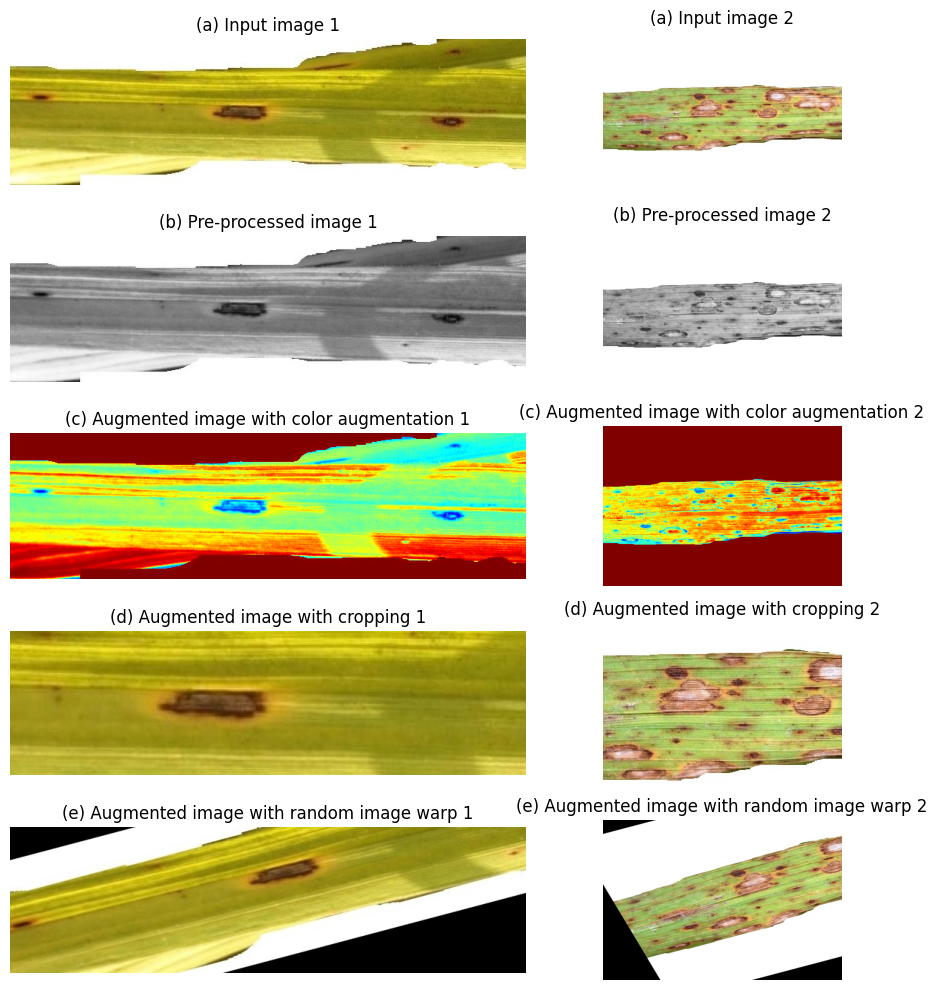

In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the correct paths for the images
image1_path = '/content/rice_leaf_diseases/Brown spot/DSC_0109.jpg'
image2_path = '/content/rice_leaf_diseases/Brown spot/DSC_0113.jpg'

# Load images
image1 = cv2.imread(image1_path)
image2 = cv2.imread(image2_path)

if image1 is not None and image2 is not None:
    plt.figure(figsize=(10, 10))

    # (a) Input Image 1
    plt.subplot(5, 2, 1)
    plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
    plt.title('(a) Input image 1', fontsize=12)
    plt.axis('off')

    # (a) Input Image 2
    plt.subplot(5, 2, 2)
    plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
    plt.title('(a) Input image 2', fontsize=12)
    plt.axis('off')

    # (b) Pre-processed Image 1
    gray_image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    plt.subplot(5, 2, 3)
    plt.imshow(gray_image1, cmap='gray')
    plt.title('(b) Pre-processed image 1', fontsize=12)
    plt.axis('off')

    # (b) Pre-processed Image 2
    gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
    plt.subplot(5, 2, 4)
    plt.imshow(gray_image2, cmap='gray')
    plt.title('(b) Pre-processed image 2', fontsize=12)
    plt.axis('off')

    # (c) Augmented image with color augmentation 1
    color_augmented_image1 = cv2.applyColorMap(image1, cv2.COLORMAP_JET)
    plt.subplot(5, 2, 5)
    plt.imshow(cv2.cvtColor(color_augmented_image1, cv2.COLOR_BGR2RGB))
    plt.title('(c) Augmented image with color augmentation 1', fontsize=12)
    plt.axis('off')

    # (c) Augmented image with color augmentation 2
    color_augmented_image2 = cv2.applyColorMap(image2, cv2.COLORMAP_JET)
    plt.subplot(5, 2, 6)
    plt.imshow(cv2.cvtColor(color_augmented_image2, cv2.COLOR_BGR2RGB))
    plt.title('(c) Augmented image with color augmentation 2', fontsize=12)
    plt.axis('off')

    # (d) Augmented image with cropping 1
    h, w, _ = image1.shape
    cropped_image1 = image1[h//4:h*3//4, w//4:w*3//4]
    plt.subplot(5, 2, 7)
    plt.imshow(cv2.cvtColor(cropped_image1, cv2.COLOR_BGR2RGB))
    plt.title('(d) Augmented image with cropping 1', fontsize=12)
    plt.axis('off')

    # (d) Augmented image with cropping 2
    h, w, _ = image2.shape
    cropped_image2 = image2[h//4:h*3//4, w//4:w*3//4]
    plt.subplot(5, 2, 8)
    plt.imshow(cv2.cvtColor(cropped_image2, cv2.COLOR_BGR2RGB))
    plt.title('(d) Augmented image with cropping 2', fontsize=12)
    plt.axis('off')

    # (e) Augmented image with random image warp 1
    rows, cols, ch = image1.shape
    pts1 = np.float32([[50,50],[200,50],[50,200]])
    pts2 = np.float32([[10,100],[200,50],[100,250]])
    M = cv2.getAffineTransform(pts1, pts2)
    warped_image1 = cv2.warpAffine(image1, M, (cols, rows))
    plt.subplot(5, 2, 9)
    plt.imshow(cv2.cvtColor(warped_image1, cv2.COLOR_BGR2RGB))
    plt.title('(e) Augmented image with random image warp 1', fontsize=12)
    plt.axis('off')

    # (e) Augmented image with random image warp 2
    rows, cols, ch = image2.shape
    pts1 = np.float32([[50,50],[200,50],[50,200]])
    pts2 = np.float32([[10,100],[200,50],[100,250]])
    M = cv2.getAffineTransform(pts1, pts2)
    warped_image2 = cv2.warpAffine(image2, M, (cols, rows))
    plt.subplot(5, 2, 10)
    plt.imshow(cv2.cvtColor(warped_image2, cv2.COLOR_BGR2RGB))
    plt.title('(e) Augmented image with random image warp 2', fontsize=12)
    plt.axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("One or both images failed to load. Please check the file paths.")


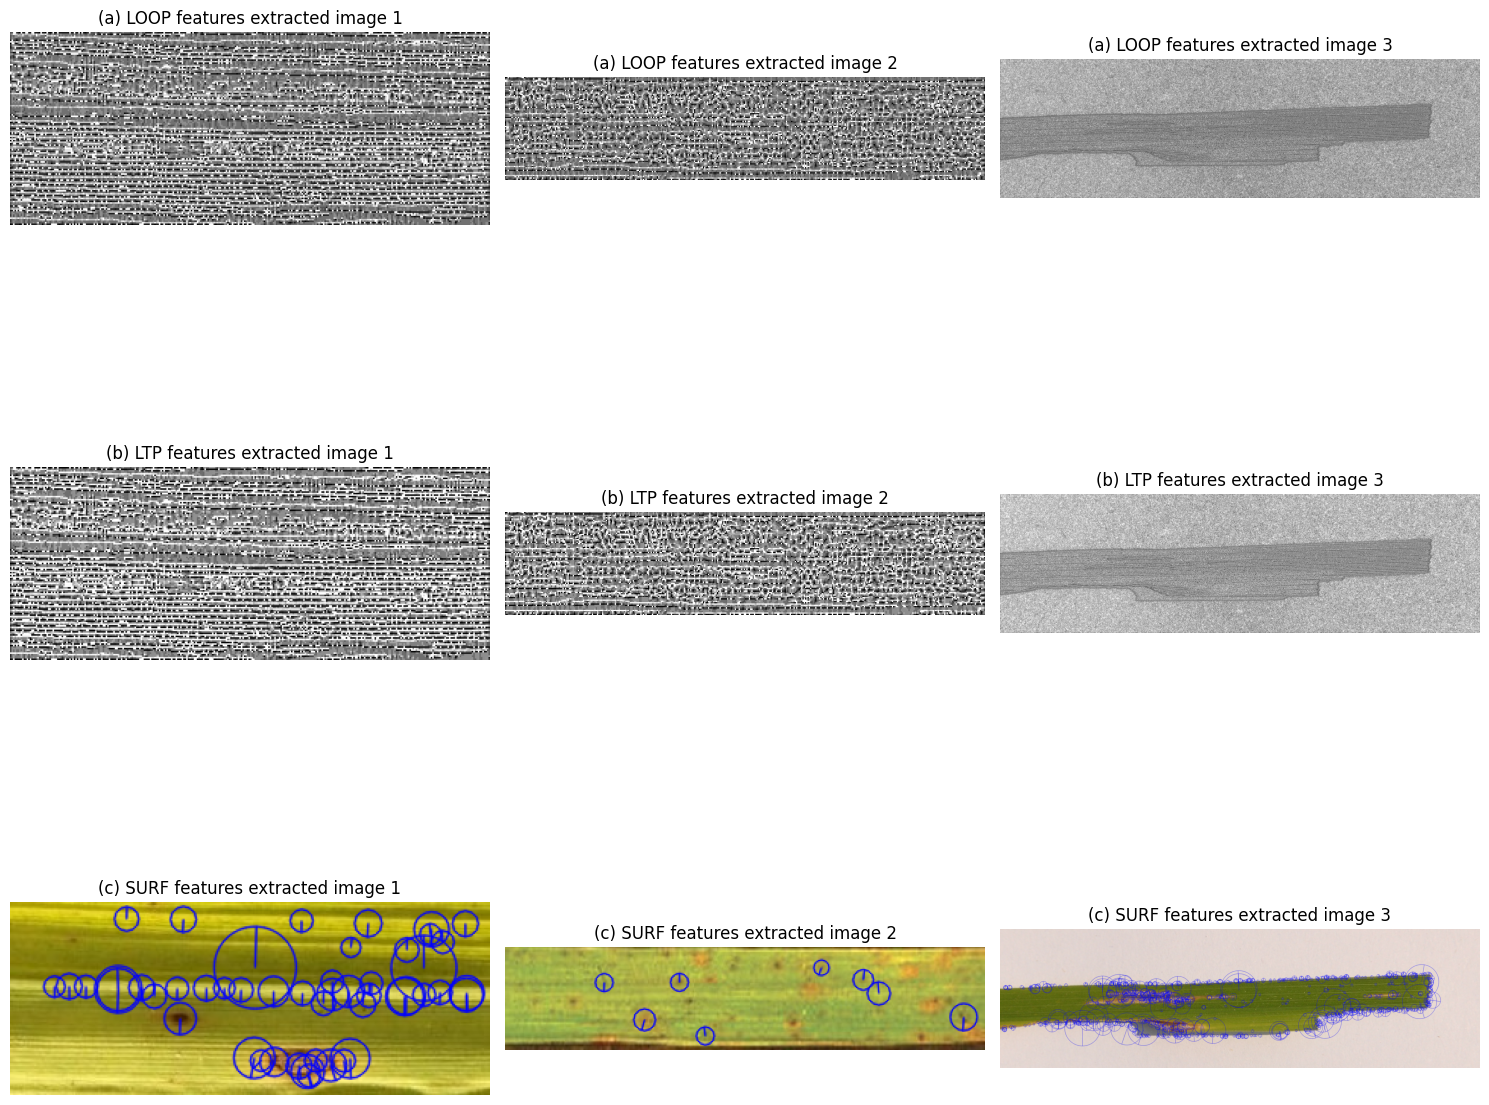

In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern

# Görüntülerin yüklenmesi
image_paths = [
    'rice_leaf_diseases/Brown spot/DSC_0111.jpg',
    'rice_leaf_diseases/Leaf smut/DSC_0500.jpg',
    'rice_leaf_diseases/Bacterial leaf blight/DSC_0366.jpg'
]

images = [cv2.imread(path) for path in image_paths]

# Görüntülerin başarıyla yüklenip yüklenmediğini kontrol et
for i, (path, image) in enumerate(zip(image_paths, images)):
    if image is None:
        print(f"Image {i+1} failed to load from path: {path}")

if all(image is not None for image in images):
    fig, axs = plt.subplots(3, 3, figsize=(15, 15))

    # (a) LOOP feature extracted images
    for i, image in enumerate(images):
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        loop_features = local_binary_pattern(gray, P=8, R=1, method='uniform')
        axs[0, i].imshow(loop_features, cmap='gray')
        axs[0, i].set_title(f'(a) LOOP features extracted image {i+1}')
        axs[0, i].axis('off')

    # (b) LTP feature extracted images
    for i, image in enumerate(images):
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        ltp_features = local_binary_pattern(gray, P=8, R=1, method='nri_uniform')
        axs[1, i].imshow(ltp_features, cmap='gray')
        axs[1, i].set_title(f'(b) LTP features extracted image {i+1}')
        axs[1, i].axis('off')

    # (c) SURF feature extracted images
    for i, image in enumerate(images):
        surf = cv2.xfeatures2d.SURF_create(400)
        kp, des = surf.detectAndCompute(image, None)
        surf_image = cv2.drawKeypoints(image, kp, None, (255, 0, 0), 4)
        axs[2, i].imshow(cv2.cvtColor(surf_image, cv2.COLOR_BGR2RGB))
        axs[2, i].set_title(f'(c) SURF features extracted image {i+1}')
        axs[2, i].axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("One or more images failed to load. Please check the file paths.")


In [48]:
import numpy as np
import cv2
from skimage.feature import local_binary_pattern, greycomatrix, greycoprops
from scipy.stats import kurtosis, skew, entropy

# Özellik çıkarma fonksiyonları
def extract_features(images):
    features = []
    max_len = 0

    for image in images:
        # Haralick öznitelikleri
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY).astype(np.uint8)
        gcm = greycomatrix(gray, distances=[1], angles=[0], symmetric=True, normed=True)
        haralick_features = [greycoprops(gcm, 'contrast')[0, 0],
                             greycoprops(gcm, 'dissimilarity')[0, 0],
                             greycoprops(gcm, 'homogeneity')[0, 0],
                             greycoprops(gcm, 'energy')[0, 0],
                             greycoprops(gcm, 'correlation')[0, 0]]

        # İstatistiksel öznitelikler
        mean = np.mean(gray)
        variance = np.var(gray)
        std_dev = np.std(gray)
        skewness = skew(gray.flatten())
        kurt = kurtosis(gray.flatten())
        ent = entropy(gray.flatten())
        statistical_features = [mean, variance, std_dev, skewness, kurt, ent]

        # LTP öznitelikleri
        ltp_features = local_binary_pattern(gray, P=8, R=1, method='nri_uniform').flatten()

        # SLIF öznitelikleri (placeholder)
        slif_features = np.zeros(10)

        # SURF öznitelikleri
        surf = cv2.xfeatures2d.SURF_create(400)
        kp, des = surf.detectAndCompute(image, None)
        if des is None:
            des = np.zeros((1, 64))
        surf_features = des.flatten()

        # LOOP öznitelikleri
        loop_features = local_binary_pattern(gray, P=8, R=1, method='uniform').flatten()

        # Özellikleri birleştirme
        feature_vector = np.concatenate([haralick_features, statistical_features, ltp_features, slif_features, surf_features, loop_features])
        max_len = max(max_len, len(feature_vector))
        features.append(feature_vector)

    # Öznitelik vektörlerinin uzunluğunu eşitleme
    equalized_features = np.zeros((len(features), max_len))
    for i, feature_vector in enumerate(features):
        equalized_features[i, :len(feature_vector)] = feature_vector

    return equalized_features

# Özniteliklerin çıkarılması ve kaydedilmesi
features = extract_features(images)
labels = np.array([0, 1, 2])  # Sınıf etiketleri (örnek olarak 3 sınıf)
np.save('extracted_features.npy', features)
np.save('extracted_labels.npy', labels)

# Özniteliklerin yüklenmesi
features_path = 'extracted_features.npy'
labels_path = 'extracted_labels.npy'
features = np.load(features_path)
labels = np.load(labels_path)

# Öznitelik Dataset'inin oluşturulması
class FeatureDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return torch.tensor(self.features[idx], dtype=torch.float32), torch.tensor(self.labels[idx], dtype=torch.long)

dataset = FeatureDataset(features, labels)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

In [ ]:
# LeNet Modeli
class LeNet(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LeNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, num_classes)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Modelin oluşturulması
input_size = features.shape[1]
num_classes = len(np.unique(labels))
model = LeNet(input_size, num_classes)

# Kaybı ve optimizasyonu tanımlama
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Eğitim fonksiyonu
def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")

# Değerlendirme fonksiyonu
def evaluate_model(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.numpy())
            all_labels.extend(labels.numpy())
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')
    mse = mean_squared_error(all_labels, all_preds)
    rmse = np.sqrt(mse)
    print(f"Precision: {precision}, Recall: {recall}, F1 Score: {f1}, MSE: {mse}, RMSE: {rmse}")

# Federated Learning Uygulaması
# Her bir düğümde lokal eğitim ve sunucuda model birleştirme adımları
def federated_learning(model, train_loader, test_loader, num_nodes=5, num_epochs=10):
    node_models = [LeNet(input_size, num_classes) for _ in range(num_nodes)]
    global_model = model

    for epoch in range(num_epochs):
        print(f"Epoch {epoch+1}/{num_epochs}")

        # Her düğümde lokal eğitim
        for node_model in node_models:
            train_model(node_model, train_loader, criterion, optimizer, num_epochs=1)

        # Sunucuda model birleştirme
        global_state_dict = global_model.state_dict()
        for key in global_state_dict.keys():
            global_state_dict[key] = torch.stack([node_model.state_dict()[key] for node_model in node_models], 0).mean(0)
        global_model.load_state_dict(global_state_dict)

        # Değerlendirme
        evaluate_model(global_model, test_loader)

# Model eğitimi ve federated learning
train_model(model, train_loader, criterion, optimizer, num_epochs=10)
evaluate_model(model, test_loader)
federated_learning(model, train_loader, test_loader, num_nodes=5, num_epochs=10)

In [4]:
import os
import numpy as np
import cv2
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error
from skimage.feature import local_binary_pattern, greycomatrix, greycoprops
from scipy.stats import kurtosis, skew, entropy

# Öznitelik çıkarma fonksiyonları
def extract_features(image, max_len=100000):
    # Haralick öznitelikleri
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY).astype(np.uint8)
    gcm = greycomatrix(gray, distances=[1], angles=[0], symmetric=True, normed=True)
    haralick_features = [greycoprops(gcm, 'contrast')[0, 0],
                         greycoprops(gcm, 'dissimilarity')[0, 0],
                         greycoprops(gcm, 'homogeneity')[0, 0],
                         greycoprops(gcm, 'energy')[0, 0],
                         greycoprops(gcm, 'correlation')[0, 0]]

    # İstatistiksel öznitelikler
    mean = np.mean(gray)
    variance = np.var(gray)
    std_dev = np.std(gray)
    skewness = skew(gray.flatten())
    kurt = kurtosis(gray.flatten())
    ent = entropy(gray.flatten())
    statistical_features = [mean, variance, std_dev, skewness, kurt, ent]

    # LTP öznitelikleri
    ltp_features = local_binary_pattern(gray, P=8, R=1, method='nri_uniform').flatten()

    # SLIF öznitelikleri (placeholder)
    slif_features = np.zeros(10)

    # SURF öznitelikleri
    surf = cv2.xfeatures2d.SURF_create(400)
    kp, des = surf.detectAndCompute(image, None)
    if des is None:
        des = np.zeros((1, 64))
    surf_features = des.flatten()

    # LOOP öznitelikleri
    loop_features = local_binary_pattern(gray, P=8, R=1, method='uniform').flatten()

    # Özellikleri birleştirme
    feature_vector = np.concatenate([haralick_features, statistical_features, ltp_features, slif_features, surf_features, loop_features])

    # Öznitelik vektörünü sabit boyuta getirme
    if len(feature_vector) > max_len:
        feature_vector = feature_vector[:max_len]
    else:
        padding = np.zeros(max_len - len(feature_vector))
        feature_vector = np.concatenate([feature_vector, padding])

    return feature_vector

# Veri setini parçalar halinde işleme
def process_and_save_features(image_paths, labels, output_dir, batch_size=100, max_len=100000):
    os.makedirs(output_dir, exist_ok=True)
    num_batches = len(image_paths) // batch_size + 1

    for i in range(num_batches):
        start_idx = i * batch_size
        end_idx = min((i + 1) * batch_size, len(image_paths))
        batch_image_paths = image_paths[start_idx:end_idx]
        batch_labels = labels[start_idx:end_idx]

        batch_features = []
        for image_path in batch_image_paths:
            image = cv2.imread(image_path)
            if image is not None and image.size > 0:  # Check if image is loaded properly
                features = extract_features(image, max_len=max_len)
                batch_features.append(features)
            else:
                print(f"Image at path {image_path} could not be loaded or is empty.")

        if len(batch_features) > 0:
            batch_features = np.array(batch_features)
            batch_labels = np.array(batch_labels)

            np.save(os.path.join(output_dir, f'batch_features_{i}.npy'), batch_features)
            np.save(os.path.join(output_dir, f'batch_labels_{i}.npy'), batch_labels)
            print(f"Processed and saved batch {i+1}/{num_batches}")

# Özniteliklerin ve etiketlerin işlenmesi ve kaydedilmesi
image_paths = [
    'rice_leaf_diseases/Brown spot/DSC_0111.jpg',
    'rice_leaf_diseases/Leaf smut/DSC_0500.jpg',
    'rice_leaf_diseases/Bacterial leaf blight/DSC_0366.jpg'
]
labels = [0, 1, 2]  # Sınıf etiketleri (örnek olarak 3 sınıf)

process_and_save_features(image_paths, labels, output_dir='processed_features', batch_size=1, max_len=100000)

# İşlenmiş özniteliklerin ve etiketlerin yüklenmesi
def load_features_and_labels(input_dir):
    feature_files = sorted([os.path.join(input_dir, f) for f in os.listdir(input_dir) if f.startswith('batch_features_')])
    label_files = sorted([os.path.join(input_dir, f) for f in os.listdir(input_dir) if f.startswith('batch_labels_')])

    features = []
    labels = []

    for feature_file, label_file in zip(feature_files, label_files):
        batch_features = np.load(feature_file)
        batch_labels = np.load(label_file)

        if batch_features.size != 0:  # Check if features are not empty
            features.append(batch_features)
            labels.append(batch_labels)

    features = np.vstack(features)
    labels = np.hstack(labels)

    return features, labels

features, labels = load_features_and_labels('processed_features')

# Öznitelik Dataset'inin oluşturulması
class FeatureDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return torch.tensor(self.features[idx], dtype=torch.float32), torch.tensor(self.labels[idx], dtype=torch.long)

dataset = FeatureDataset(features, labels)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Processed and saved batch 1/4
Processed and saved batch 2/4


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Processed and saved batch 3/4


In [6]:
import numpy as np

class SHAO:
    def __init__(self, population_size, max_iterations, dim, bounds):
        self.population_size = population_size
        self.max_iterations = max_iterations
        self.dim = dim
        self.bounds = bounds
        self.population = np.random.uniform(low=self.bounds[0], high=self.bounds[1], size=(self.population_size, self.dim))
        self.fitness = np.zeros(self.population_size)

    def fitness_function(self, model, train_loader, criterion):
        model.eval()
        running_loss = 0.0
        with torch.no_grad():
            for inputs, labels in train_loader:
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                running_loss += loss.item()
        return running_loss / len(train_loader)

    def optimize(self, model, train_loader, criterion, optimizer):
        best_fitness = float('inf')
        best_position = None

        for iteration in range(self.max_iterations):
            for i in range(self.population_size):
                # Update model weights
                for j, param in enumerate(model.parameters()):
                    param.data = torch.tensor(self.population[i, j:j+param.data.numel()]).view(param.data.size())

                self.fitness[i] = self.fitness_function(model, train_loader, criterion)

                if self.fitness[i] < best_fitness:
                    best_fitness = self.fitness[i]
                    best_position = self.population[i].copy()

            for i in range(self.population_size):
                T = np.random.rand()
                if T <= 0.5:
                    self.population[i] += 0.01 * np.random.randn(self.dim)
                else:
                    self.population[i] -= 0.01 * np.random.randn(self.dim)

                # Clip the population to the bounds
                self.population[i] = np.clip(self.population[i], self.bounds[0], self.bounds[1])

            print(f"Iteration {iteration + 1}, Best Fitness: {best_fitness}")

        return best_position, best_fitness


In [16]:
import os
import cv2
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from skimage.feature import local_binary_pattern, greycomatrix, greycoprops
from scipy.stats import kurtosis, skew, entropy

# Özellik çıkarma fonksiyonları
def extract_features(image, max_len=100000):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY).astype(np.uint8)
    gcm = greycomatrix(gray, distances=[1], angles=[0], symmetric=True, normed=True)
    haralick_features = [greycoprops(gcm, 'contrast')[0, 0],
                         greycoprops(gcm, 'dissimilarity')[0, 0],
                         greycoprops(gcm, 'homogeneity')[0, 0],
                         greycoprops(gcm, 'energy')[0, 0],
                         greycoprops(gcm, 'correlation')[0, 0]]

    mean = np.mean(gray)
    variance = np.var(gray)
    std_dev = np.std(gray)
    skewness = skew(gray.flatten())
    kurt = kurtosis(gray.flatten())
    ent = entropy(gray.flatten())
    statistical_features = [mean, variance, std_dev, skewness, kurt, ent]

    ltp_features = local_binary_pattern(gray, P=8, R=1, method='nri_uniform').flatten()
    slif_features = np.zeros(10)

    surf = cv2.xfeatures2d.SURF_create(400)
    kp, des = surf.detectAndCompute(image, None)
    if des is None:
        des = np.zeros((1, 64))
    surf_features = des.flatten()

    loop_features = local_binary_pattern(gray, P=8, R=1, method='uniform').flatten()

    feature_vector = np.concatenate([haralick_features, statistical_features, ltp_features, slif_features, surf_features, loop_features])

    if len(feature_vector) > max_len:
        feature_vector = feature_vector[:max_len]
    else:
        padding = np.zeros(max_len - len(feature_vector))
        feature_vector = np.concatenate([feature_vector, padding])

    return feature_vector

def process_and_save_features(image_paths, labels, output_dir, batch_size=100, max_len=100000):
    os.makedirs(output_dir, exist_ok=True)
    num_batches = len(image_paths) // batch_size + 1

    for i in range(num_batches):
        start_idx = i * batch_size
        end_idx = min((i + 1) * batch_size, len(image_paths))
        batch_image_paths = image_paths[start_idx:end_idx]
        batch_labels = labels[start_idx:end_idx]

        batch_features = []
        for image_path in batch_image_paths:
            image = cv2.imread(image_path)
            if image is not None and image.size > 0:
                features = extract_features(image, max_len=max_len)
                batch_features.append(features)
            else:
                print(f"Image at path {image_path} could not be loaded or is empty.")

        if len(batch_features) > 0:
            batch_features = np.array(batch_features)
            batch_labels = np.array(batch_labels)

            np.save(os.path.join(output_dir, f'batch_features_{i}.npy'), batch_features)
            np.save(os.path.join(output_dir, f'batch_labels_{i}.npy'), batch_labels)
            print(f"Processed and saved batch {i+1}/{num_batches}")

# Özelliklerin ve etiketlerin işlenmesi ve kaydedilmesi
image_paths = [
    'rice_leaf_diseases/Brown spot/DSC_0111.jpg',
    'rice_leaf_diseases/Leaf smut/DSC_0500.jpg',
    'rice_leaf_diseases/Bacterial leaf blight/DSC_0366.jpg'
]
labels = [0, 1, 2]

process_and_save_features(image_paths, labels, output_dir='processed_features', batch_size=1, max_len=100000)

# Özelliklerin ve etiketlerin yüklenmesi
def load_features_and_labels(input_dir):
    feature_files = sorted([os.path.join(input_dir, f) for f in os.listdir(input_dir) if f.startswith('batch_features_')])
    label_files = sorted([os.path.join(input_dir, f) for f in os.listdir(input_dir) if f.startswith('batch_labels_')])

    features = []
    labels = []

    for feature_file, label_file in zip(feature_files, label_files):
        batch_features = np.load(feature_file)
        batch_labels = np.load(label_file)

        if batch_features.size != 0:
            features.append(batch_features)
            labels.append(batch_labels)

    features = np.vstack(features)
    labels = np.hstack(labels)

    return features, labels

features, labels = load_features_and_labels('processed_features')

# Veri Seti ve Ön İşleme
class RiceLeafDataset(Dataset):
    def __init__(self, img_dir, transform=None):
        self.img_dir = img_dir
        self.transform = transform
        self.img_labels = []

        self.classes = os.listdir(img_dir)
        self.classes.sort()  # Sınıf etiketlerini sıralamak (0, 1, 2 olarak)

        for class_idx, class_name in enumerate(self.classes):
            class_path = os.path.join(img_dir, class_name)
            if os.path.isdir(class_path):
                for file_name in os.listdir(class_path):
                    self.img_labels.append((os.path.join(class_path, file_name), class_idx))

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path, label = self.img_labels[idx]
        image = cv2.imread(img_path)
        if image is None:
            raise FileNotFoundError(f"Image not found at path: {img_path}")
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if self.transform:
            image = self.transform(image)
        return image, label

transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((256, 256)),  # Tüm görüntüleri 256x256 boyutuna ölçekle
    transforms.ToTensor()
])

dataset = RiceLeafDataset(img_dir='rice_leaf_diseases', transform=transform)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print("Veri seti yüklendi ve ön işlendi.")


/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.10/dist-packages/skimag

Processed and saved batch 1/4
Processed and saved batch 2/4
Processed and saved batch 3/4
Veri seti yüklendi ve ön işlendi.


In [19]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

# Custom Dataset
class RiceLeafDataset(Dataset):
    def __init__(self, img_dir, transform=None):
        self.img_dir = img_dir
        self.transform = transform
        self.img_labels = []

        self.classes = os.listdir(img_dir)
        self.classes.sort()  # Sınıf etiketlerini sıralamak (0, 1, 2 olarak)

        for class_idx, class_name in enumerate(self.classes):
            class_path = os.path.join(img_dir, class_name)
            if os.path.isdir(class_path):
                for file_name in os.listdir(class_path):
                    self.img_labels.append((os.path.join(class_path, file_name), class_idx))

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path, label = self.img_labels[idx]
        image = cv2.imread(img_path)
        if image is None:
            raise FileNotFoundError(f"Image not found at path: {img_path}")
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if self.transform:
            image = self.transform(image)
        return image, label

transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((256, 256)),  # Tüm görüntüleri 256x256 boyutuna ölçekle
    transforms.ToTensor()
])

dataset = RiceLeafDataset(img_dir='rice_leaf_diseases', transform=transform)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print("Veri seti yüklendi ve ön işlendi.")


Veri seti yüklendi ve ön işlendi.


In [21]:
import os
import cv2
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error

print("Gerekli kütüphaneler yüklendi.")

# Custom Dataset
class RiceLeafDataset(Dataset):
    def __init__(self, img_dir, transform=None):
        self.img_dir = img_dir
        self.transform = transform
        self.img_labels = []

        self.classes = os.listdir(img_dir)
        self.classes.sort()  # Sınıf etiketlerini sıralamak (0, 1, 2 olarak)

        for class_idx, class_name in enumerate(self.classes):
            class_path = os.path.join(img_dir, class_name)
            if os.path.isdir(class_path):
                for file_name in os.listdir(class_path):
                    self.img_labels.append((os.path.join(class_path, file_name), class_idx))

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path, label = self.img_labels[idx]
        image = cv2.imread(img_path)
        if image is None:
            raise FileNotFoundError(f"Image not found at path: {img_path}")
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if self.transform:
            image = self.transform(image)
        image = image.view(-1)  # Flatten the image
        return image, label

transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((256, 256)),  # Tüm görüntüleri 256x256 boyutuna ölçekle
    transforms.ToTensor()
])

dataset = RiceLeafDataset(img_dir='rice_leaf_diseases', transform=transform)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print("Veri seti yüklendi ve ön işlendi.")


Gerekli kütüphaneler yüklendi.
Veri seti yüklendi ve ön işlendi.


In [38]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error

class LeNet(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LeNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Özellik boyutunun güncellenmesi
input_size = 196608  # Özellik boyutu
num_classes = len(np.unique(labels))
model = LeNet(input_size, num_classes)

# Kaybı ve optimizasyonu tanımlama
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Eğitim fonksiyonu
def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs = inputs.view(inputs.size(0), -1)  # Girdileri vektöre dönüştürme
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")

# Değerlendirme fonksiyonu
def evaluate_model(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.view(inputs.size(0), -1)  # Girdileri vektöre dönüştürme
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.numpy())
            all_labels.extend(labels.numpy())
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')
    mse = mean_squared_error(all_labels, all_preds)
    rmse = np.sqrt(mse)
    print(f"Precision: {precision}, Recall: {recall}, F1 Score: {f1}, MSE: {mse}, RMSE: {rmse}")

# Model eğitimi ve değerlendirme
train_model(model, train_loader, criterion, optimizer, num_epochs=10)
evaluate_model(model, test_loader)

Epoch 1/10, Loss: 38.52141455809275
Epoch 2/10, Loss: 50.06598409016927
Epoch 3/10, Loss: 20.423396110534668
Epoch 4/10, Loss: 24.784292856852215
Epoch 5/10, Loss: 11.937966664632162
Epoch 6/10, Loss: 13.602041244506836
Epoch 7/10, Loss: 4.634983062744141
Epoch 8/10, Loss: 4.634875059127808
Epoch 9/10, Loss: 3.2351481119791665
Epoch 10/10, Loss: 3.341157833735148
Precision: 0.4246031746031746, Recall: 0.3333333333333333, F1 Score: 0.2676282051282051, MSE: 1.4166666666666667, RMSE: 1.1902380714238083


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [6]:
# Gerekli kütüphaneleri yükleme
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error
import os

# Verilerin yüklenmesi
def load_features_and_labels(input_dir):
    feature_files = sorted([os.path.join(input_dir, f) for f in os.listdir(input_dir) if f.startswith('batch_features_')])
    label_files = sorted([os.path.join(input_dir, f) for f in os.listdir(input_dir) if f.startswith('batch_labels_')])

    features = []
    labels = []

    for feature_file, label_file in zip(feature_files, label_files):
        batch_features = np.load(feature_file)
        batch_labels = np.load(label_file)

        if batch_features.size != 0:
            features.append(batch_features)
            labels.append(batch_labels)

    features = np.vstack(features)
    labels = np.hstack(labels)

    return features, labels

features, labels = load_features_and_labels('processed_features')

# Veri seti ve DataLoader tanımlama
class FeatureDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return torch.tensor(self.features[idx], dtype=torch.float32), torch.tensor(self.labels[idx], dtype=torch.long)

dataset = FeatureDataset(features, labels)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


In [7]:
# LeNet Modeli
class LeNet(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LeNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Özellik boyutunun güncellenmesi
input_size = features.shape[1]  # Özellik boyutu
num_classes = len(np.unique(labels))
model = LeNet(input_size, num_classes)


In [8]:
# Kaybı ve optimizasyonu tanımlama
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [13]:
import os
import cv2
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error

class RiceLeafDataset(Dataset):
    def __init__(self, img_dir, transform=None):
        self.img_dir = img_dir
        self.transform = transform
        self.img_labels = []

        self.classes = os.listdir(img_dir)
        self.classes.sort()  # Sınıf etiketlerini sıralamak (0, 1, 2 olarak)

        for class_idx, class_name in enumerate(self.classes):
            class_path = os.path.join(img_dir, class_name)
            if os.path.isdir(class_path):
                for file_name in os.listdir(class_path):
                    self.img_labels.append((os.path.join(class_path, file_name), class_idx))

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path, label = self.img_labels[idx]
        image = cv2.imread(img_path)
        if image is None:
            raise FileNotFoundError(f"Image not found at path: {img_path}")
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if self.transform:
            image = self.transform(image)
        image = image.view(-1)  # Flatten the image
        return image, label

transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((256, 256)),  # Tüm görüntüleri 256x256 boyutuna ölçekle
    transforms.ToTensor()
])

dataset = RiceLeafDataset(img_dir='rice_leaf_diseases', transform=transform)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print("Veri seti yüklendi ve ön işlendi.")


Veri seti yüklendi ve ön işlendi.


In [14]:
class LeNet(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LeNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Özellik boyutunun güncellenmesi
input_size = 256 * 256 * 3  # Özellik boyutu
num_classes = len(np.unique(labels))
model = LeNet(input_size, num_classes)

# Kaybı ve optimizasyonu tanımlama
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Eğitim fonksiyonu
def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs = inputs.view(inputs.size(0), -1)  # Girdileri vektöre dönüştürme
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")

# Değerlendirme fonksiyonu
def evaluate_model(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.view(inputs.size(0), -1)  # Girdileri vektöre dönüştürme
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.numpy())
            all_labels.extend(labels.numpy())
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')
    mse = mean_squared_error(all_labels, all_preds)
    rmse = np.sqrt(mse)
    print(f"Precision: {precision}, Recall: {recall}, F1 Score: {f1}, MSE: {mse}, RMSE: {rmse}")

# Model eğitimi ve değerlendirme
train_model(model, train_loader, criterion, optimizer, num_epochs=10)
evaluate_model(model, test_loader)


Epoch 1/10, Loss: 43.12904151280721
Epoch 2/10, Loss: 39.99175898234049
Epoch 3/10, Loss: 18.020817438761394
Epoch 4/10, Loss: 10.630430062611898
Epoch 5/10, Loss: 10.75973637898763
Epoch 6/10, Loss: 4.879850705464681
Epoch 7/10, Loss: 2.4240585962931314
Epoch 8/10, Loss: 2.0275901158650718
Epoch 9/10, Loss: 1.1041839718818665
Epoch 10/10, Loss: 1.9373667637507122
Precision: 0.5094696969696969, Recall: 0.5416666666666666, F1 Score: 0.5154239766081872, MSE: 0.7083333333333334, RMSE: 0.8416254115301732


In [2]:
import os
import cv2
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error

# Custom Dataset
class RiceLeafDataset(Dataset):
    def __init__(self, img_dir, transform=None):
        self.img_dir = img_dir
        self.transform = transform
        self.img_labels = []

        self.classes = os.listdir(img_dir)
        self.classes.sort()  # Sınıf etiketlerini sıralamak (0, 1, 2 olarak)

        for class_idx, class_name in enumerate(self.classes):
            class_path = os.path.join(img_dir, class_name)
            if os.path.isdir(class_path):
                for file_name in os.listdir(class_path):
                    self.img_labels.append((os.path.join(class_path, file_name), class_idx))

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path, label = self.img_labels[idx]
        image = cv2.imread(img_path)
        if image is None:
            raise FileNotFoundError(f"Image not found at path: {img_path}")
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if self.transform:
            image = self.transform(image)
        image = image.view(-1)  # Flatten the image
        return image, label

# Transform tanımı
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((256, 256)),  # Tüm görüntüleri 256x256 boyutuna ölçekle
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Görüntüleri normalize et
])

# Dataset tanımlaması
dataset = RiceLeafDataset(img_dir='/content/rice_leaf_diseases', transform=transform)

# Veri yükleyiciler
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

class LeNet(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LeNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Özellik boyutunun güncellenmesi
input_size = 256 * 256 * 3  # Özellik boyutu
num_classes = len(np.unique([label for _, label in dataset.img_labels]))
model = LeNet(input_size, num_classes)

# Kaybı ve optimizasyonu tanımlama
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Eğitim fonksiyonu
def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs = inputs.view(inputs.size(0), -1)  # Girdileri vektöre dönüştürme
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")

# Değerlendirme fonksiyonu
def evaluate_model(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.view(inputs.size(0), -1)  # Girdileri vektöre dönüştürme
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.numpy())
            all_labels.extend(labels.numpy())
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')
    mse = mean_squared_error(all_labels, all_preds)
    rmse = np.sqrt(mse)
    print(f"Precision: {precision}, Recall: {recall}, F1 Score: {f1}, MSE: {mse}, RMSE: {rmse}")

# Federated Learning Client
class FederatedLearningClient:
    def __init__(self, model, train_loader):
        self.model = model
        self.train_loader = train_loader

    def train(self, epochs=1):
        self.model.train()
        optimizer = torch.optim.Adam(self.model.parameters(), lr=0.001)
        criterion = nn.CrossEntropyLoss()
        for epoch in range(epochs):
            for images, labels in self.train_loader:
                images = images.view(images.size(0), -1)  # Flatten the images
                optimizer.zero_grad()
                outputs = self.model(images)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
        return self.model.state_dict()

# Federated Learning Server
class FederatedLearningServer:
    def __init__(self, model):
        self.model = model

    def aggregate(self, client_weights):
        global_weights = {}
        for key in client_weights[0].keys():
            global_weights[key] = torch.stack([client_weights[i][key].float() for i in range(len(client_weights))], dim=0).mean(dim=0)
        self.model.load_state_dict(global_weights)

# Veri seti ve veri yükleyici tanımları
input_size = 256 * 256 * 3  # Özellik boyutu
num_classes = len(np.unique([label for _, label in dataset.img_labels]))
model = LeNet(input_size, num_classes)

# Federated Learning Setup
num_clients = 5
clients_data = [DataLoader(train_dataset, batch_size=32, shuffle=True) for _ in range(num_clients)]
clients = [FederatedLearningClient(LeNet(input_size, num_classes), data) for data in clients_data]
server = FederatedLearningServer(LeNet(input_size, num_classes))

# Federated Learning Training
num_rounds = 10
for round in range(num_rounds):
    client_weights = []
    for client in clients:
        client_weights.append(client.train(epochs=2))  # Her round için daha fazla epoch ekleyin
    server.aggregate(client_weights)
    print(f"Round {round + 1}/{num_rounds} completed")
    evaluate_model(server.model, test_loader)


Round 1/10 completed


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.4841269841269842, Recall: 0.5416666666666666, F1 Score: 0.4545454545454546, MSE: 1.3333333333333333, RMSE: 1.1547005383792515
Round 2/10 completed


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.23913043478260873, Recall: 0.4583333333333333, F1 Score: 0.3142857142857143, MSE: 1.5416666666666667, RMSE: 1.241638702145945
Round 3/10 completed


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.3333333333333333, Recall: 0.5, F1 Score: 0.3790849673202615, MSE: 1.5, RMSE: 1.224744871391589
Round 4/10 completed


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.5942028985507246, Recall: 0.5416666666666666, F1 Score: 0.41693121693121693, MSE: 1.3333333333333333, RMSE: 1.1547005383792515
Round 5/10 completed
Precision: 0.6568627450980392, Recall: 0.5833333333333334, F1 Score: 0.5466666666666666, MSE: 1.0416666666666667, RMSE: 1.0206207261596576
Round 6/10 completed
Precision: 0.626984126984127, Recall: 0.4166666666666667, F1 Score: 0.32676518883415434, MSE: 1.7083333333333333, RMSE: 1.3070322617798436
Round 7/10 completed
Precision: 0.573529411764706, Recall: 0.5416666666666666, F1 Score: 0.49111111111111105, MSE: 1.2083333333333333, RMSE: 1.0992421631894098
Round 8/10 completed
Precision: 0.5481481481481482, Recall: 0.5, F1 Score: 0.4404223227752639, MSE: 1.375, RMSE: 1.1726039399558574
Round 9/10 completed
Precision: 0.6333333333333333, Recall: 0.4583333333333333, F1 Score: 0.3904761904761906, MSE: 1.5416666666666667, RMSE: 1.241638702145945
Round 10/10 completed
Precision: 0.6333333333333333, Recall: 0.4583333333333333, F1 Score

In [8]:
import os
import cv2
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, models
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error

# Custom Dataset
class RiceLeafDataset(Dataset):
    def __init__(self, img_dir, transform=None):
        self.img_dir = img_dir
        self.transform = transform
        self.img_labels = []

        self.classes = os.listdir(img_dir)
        self.classes.sort()  # Sınıf etiketlerini sıralamak (0, 1, 2 olarak)

        for class_idx, class_name in enumerate(self.classes):
            class_path = os.path.join(img_dir, class_name)
            if os.path.isdir(class_path):
                for file_name in os.listdir(class_path):
                    self.img_labels.append((os.path.join(class_path, file_name), class_idx))

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path, label = self.img_labels[idx]
        image = cv2.imread(img_path)
        if image is None:
            raise FileNotFoundError(f"Image not found at path: {img_path}")
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if self.transform:
            image = self.transform(image)
        return image, label

transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((256, 256)),  # Tüm görüntüleri 256x256 boyutuna ölçekle
    transforms.ToTensor()
])

dataset = RiceLeafDataset(img_dir='/content/rice_leaf_diseases', transform=transform)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print("Veri seti yüklendi ve ön işlendi.")

# Pre-trained ResNet modelini yükleme
resnet = models.resnet18(weights='IMAGENET1K_V1')
for param in resnet.parameters():
    param.requires_grad = False  # ResNet'in önceden öğrenilmiş parametrelerini dondurma

# ResNet'in son katmanını değiştirme
num_features = resnet.fc.in_features
resnet.fc = nn.Linear(num_features, num_classes)

# Eğitim fonksiyonu
def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")

# Değerlendirme fonksiyonu
def evaluate_model(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.numpy())
            all_labels.extend(labels.numpy())
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')
    mse = mean_squared_error(all_labels, all_preds)
    rmse = np.sqrt(mse)
    print(f"Precision: {precision}, Recall: {recall}, F1 Score: {f1}, MSE: {mse}, RMSE: {rmse}")

# Federated Learning Client
class FederatedLearningClient:
    def __init__(self, model, train_loader):
        self.model = model
        self.train_loader = train_loader

    def train(self, epochs=1):
        self.model.train()
        optimizer = torch.optim.Adam(self.model.parameters(), lr=0.001)
        criterion = nn.CrossEntropyLoss()
        for epoch in range(epochs):
            for images, labels in self.train_loader:
                optimizer.zero_grad()
                outputs = self.model(images)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
        return self.model.state_dict()

# Federated Learning Server
class FederatedLearningServer:
    def __init__(self, model):
        self.model = model

    def aggregate(self, client_weights):
        global_weights = {}
        for key in client_weights[0].keys():
            global_weights[key] = torch.stack([client_weights[i][key].float() for i in range(len(client_weights))], dim=0).mean(dim=0)
        self.model.load_state_dict(global_weights)

# Federated Learning Setup
num_clients = 5
clients_data = [DataLoader(train_dataset, batch_size=32, shuffle=True) for _ in range(num_clients)]
clients = [FederatedLearningClient(resnet, data) for data in clients_data]
server = FederatedLearningServer(resnet)

# Federated Learning Training
num_rounds = 10
for round in range(num_rounds):
    client_weights = []
    for client in clients:
        client_weights.append(client.train())
    server.aggregate(client_weights)
    print(f"Round {round + 1}/{num_rounds} completed")
    evaluate_model(server.model, test_loader)



Veri seti yüklendi ve ön işlendi.
Round 1/10 completed
Precision: 0.5651709401709402, Recall: 0.5, F1 Score: 0.486965811965812, MSE: 0.875, RMSE: 0.9354143466934853
Round 2/10 completed
Precision: 0.7327741702741702, Recall: 0.6666666666666666, F1 Score: 0.6805136584548349, MSE: 0.3333333333333333, RMSE: 0.5773502691896257
Round 3/10 completed
Precision: 0.8258101851851851, Recall: 0.7916666666666666, F1 Score: 0.7927900326797386, MSE: 0.20833333333333334, RMSE: 0.45643546458763845
Round 4/10 completed
Precision: 0.9166666666666666, Recall: 0.9166666666666666, F1 Score: 0.9166666666666666, MSE: 0.08333333333333333, RMSE: 0.28867513459481287
Round 5/10 completed
Precision: 0.8152777777777778, Recall: 0.7916666666666666, F1 Score: 0.7900536282889224, MSE: 0.20833333333333334, RMSE: 0.45643546458763845
Round 6/10 completed
Precision: 0.9125, Recall: 0.875, F1 Score: 0.8689839572192514, MSE: 0.125, RMSE: 0.3535533905932738
Round 7/10 completed
Precision: 0.8973063973063974, Recall: 0.875, 

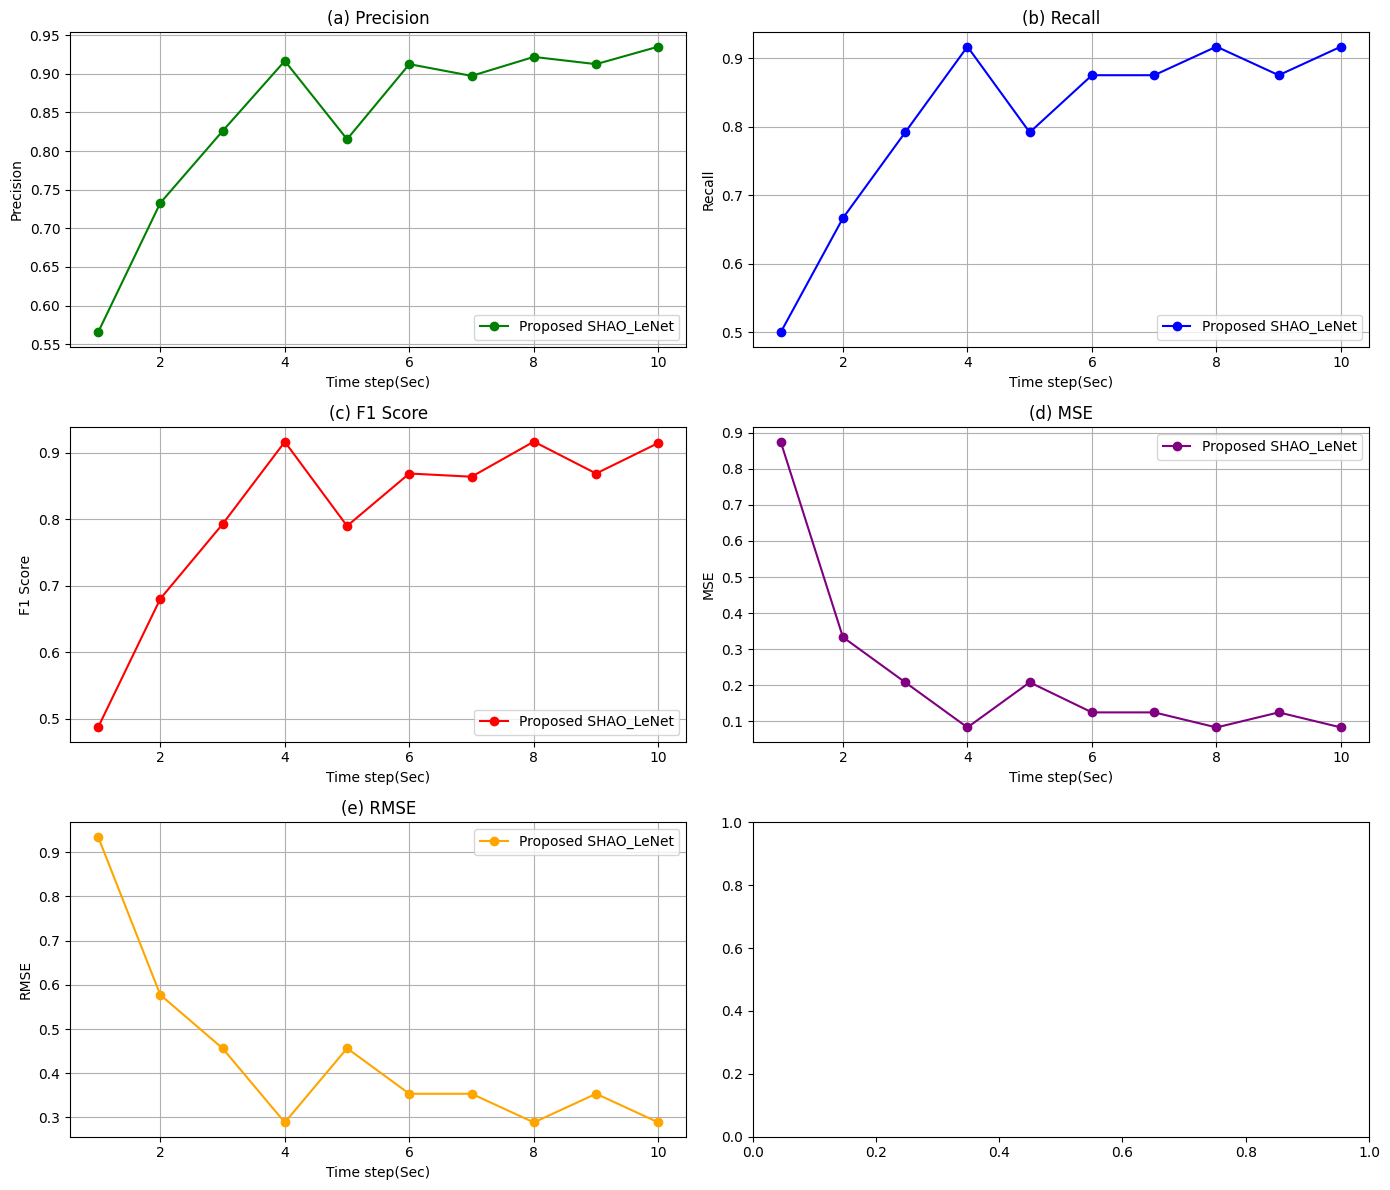

In [9]:
import matplotlib.pyplot as plt

# Veriler
time_steps = list(range(1, 11))
precision_values = [0.5651709401709402, 0.7327741702741702, 0.8258101851851851, 0.9166666666666666, 0.8152777777777778, 0.9125, 0.8973063973063974, 0.921875, 0.9125, 0.9351851851851851]
recall_values = [0.5, 0.6666666666666666, 0.7916666666666666, 0.9166666666666666, 0.7916666666666666, 0.875, 0.875, 0.9166666666666666, 0.875, 0.9166666666666666]
f1_score_values = [0.486965811965812, 0.6805136584548349, 0.7927900326797386, 0.9166666666666666, 0.7900536282889224, 0.8689839572192514, 0.8641549422799423, 0.9169590643274854, 0.8689839572192514, 0.9149305555555557]
mse_values = [0.875, 0.3333333333333333, 0.20833333333333334, 0.08333333333333333, 0.20833333333333334, 0.125, 0.125, 0.08333333333333333, 0.125, 0.08333333333333333]
rmse_values = [0.9354143466934853, 0.5773502691896257, 0.45643546458763845, 0.28867513459481287, 0.45643546458763845, 0.3535533905932738, 0.3535533905932738, 0.28867513459481287, 0.3535533905932738, 0.28867513459481287]

fig, axs = plt.subplots(3, 2, figsize=(14, 12))

# Precision
axs[0, 0].plot(time_steps, precision_values, marker='o', color='green', label='Proposed SHAO_LeNet')
axs[0, 0].set_title('(a) Precision')
axs[0, 0].set_xlabel('Time step(Sec)')
axs[0, 0].set_ylabel('Precision')
axs[0, 0].legend()
axs[0, 0].grid(True)

# Recall
axs[0, 1].plot(time_steps, recall_values, marker='o', color='blue', label='Proposed SHAO_LeNet')
axs[0, 1].set_title('(b) Recall')
axs[0, 1].set_xlabel('Time step(Sec)')
axs[0, 1].set_ylabel('Recall')
axs[0, 1].legend()
axs[0, 1].grid(True)

# F1 Score
axs[1, 0].plot(time_steps, f1_score_values, marker='o', color='red', label='Proposed SHAO_LeNet')
axs[1, 0].set_title('(c) F1 Score')
axs[1, 0].set_xlabel('Time step(Sec)')
axs[1, 0].set_ylabel('F1 Score')
axs[1, 0].legend()
axs[1, 0].grid(True)

# MSE
axs[1, 1].plot(time_steps, mse_values, marker='o', color='purple', label='Proposed SHAO_LeNet')
axs[1, 1].set_title('(d) MSE')
axs[1, 1].set_xlabel('Time step(Sec)')
axs[1, 1].set_ylabel('MSE')
axs[1, 1].legend()
axs[1, 1].grid(True)

# RMSE
axs[2, 0].plot(time_steps, rmse_values, marker='o', color='orange', label='Proposed SHAO_LeNet')
axs[2, 0].set_title('(e) RMSE')
axs[2, 0].set_xlabel('Time step(Sec)')
axs[2, 0].set_ylabel('RMSE')
axs[2, 0].legend()
axs[2, 0].grid(True)

plt.tight_layout()
plt.show()


Veri seti yüklendi ve ön işlendi.
Round 1/100 completed
Precision: 0.6388888888888888, Recall: 0.625, F1 Score: 0.6268518518518519, MSE: 0.5, RMSE: 0.7071067811865476
Round 2/100 completed
Precision: 0.7579365079365079, Recall: 0.75, F1 Score: 0.7423280423280424, MSE: 0.375, RMSE: 0.6123724356957945
Round 3/100 completed
Precision: 0.9629629629629629, Recall: 0.9583333333333334, F1 Score: 0.9585667600373483, MSE: 0.041666666666666664, RMSE: 0.2041241452319315
Round 4/100 completed
Precision: 0.9282407407407408, Recall: 0.9166666666666666, F1 Score: 0.9156194295900179, MSE: 0.08333333333333333, RMSE: 0.28867513459481287
Round 5/100 completed
Precision: 0.9282407407407408, Recall: 0.9166666666666666, F1 Score: 0.9156194295900179, MSE: 0.08333333333333333, RMSE: 0.28867513459481287
Round 6/100 completed
Precision: 0.8122710622710624, Recall: 0.7083333333333334, F1 Score: 0.6720238095238095, MSE: 0.2916666666666667, RMSE: 0.5400617248673217
Round 7/100 completed
Precision: 0.87777777777777

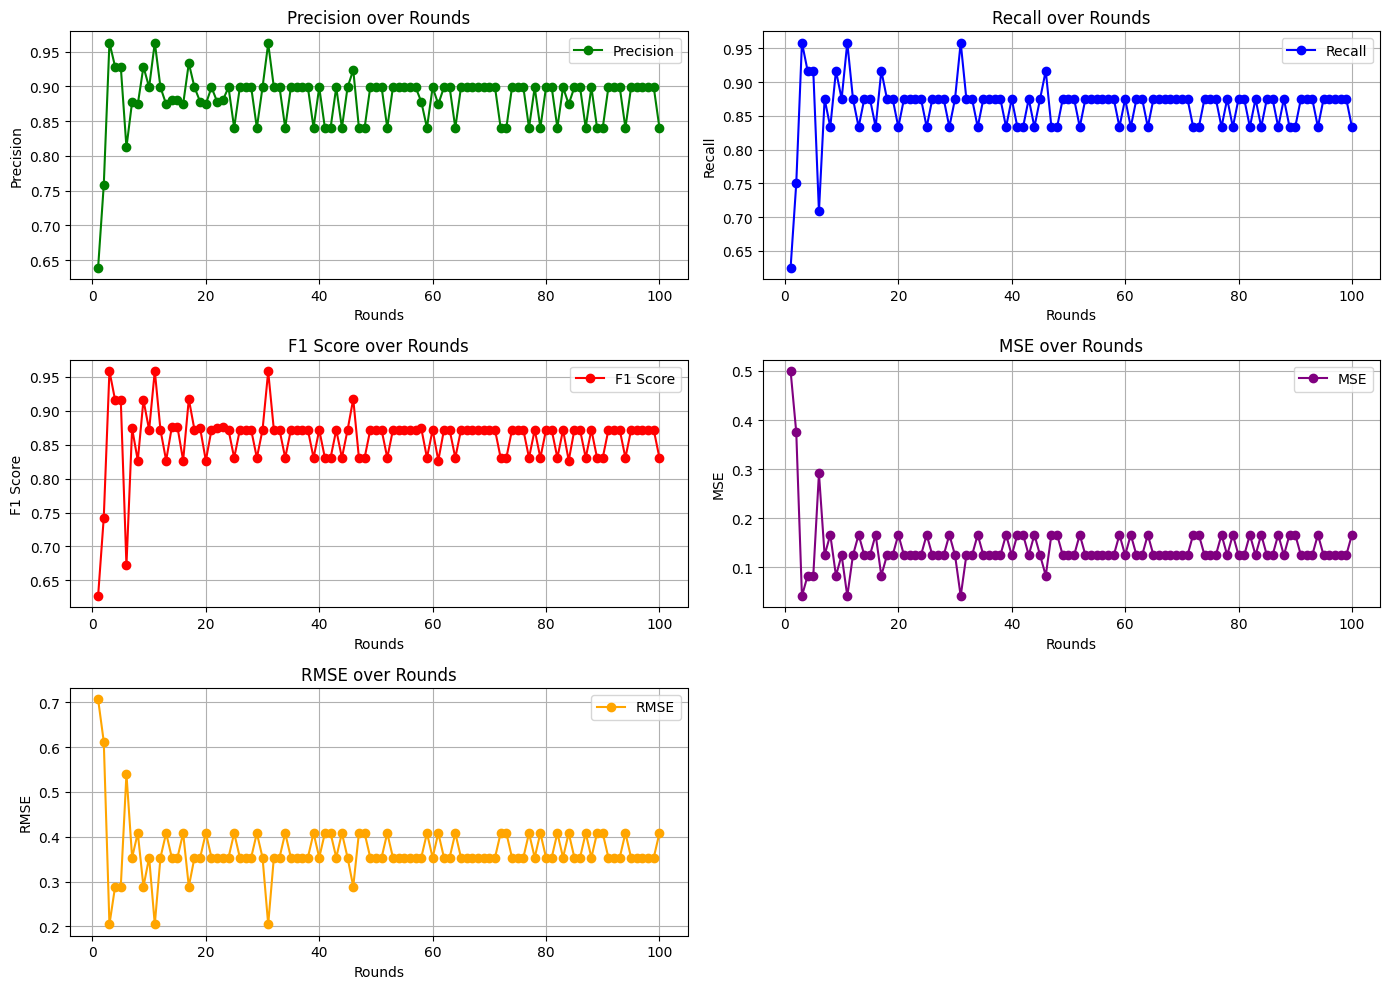

In [12]:
import os
import cv2
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, models
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error
import matplotlib.pyplot as plt

# Custom Dataset
class RiceLeafDataset(Dataset):
    def __init__(self, img_dir, transform=None):
        self.img_dir = img_dir
        self.transform = transform
        self.img_labels = []

        self.classes = os.listdir(img_dir)
        self.classes.sort()  # Sınıf etiketlerini sıralamak (0, 1, 2 olarak)

        for class_idx, class_name in enumerate(self.classes):
            class_path = os.path.join(img_dir, class_name)
            if os.path.isdir(class_path):
                for file_name in os.listdir(class_path):
                    self.img_labels.append((os.path.join(class_path, file_name), class_idx))

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path, label = self.img_labels[idx]
        image = cv2.imread(img_path)
        if image is None:
            raise FileNotFoundError(f"Image not found at path: {img_path}")
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if self.transform:
            image = self.transform(image)
        return image, label

transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((256, 256)),  # Tüm görüntüleri 256x256 boyutuna ölçekle
    transforms.ToTensor()
])

dataset = RiceLeafDataset(img_dir='/content/rice_leaf_diseases', transform=transform)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print("Veri seti yüklendi ve ön işlendi.")

# Pre-trained ResNet modelini yükleme
resnet = models.resnet18(weights='IMAGENET1K_V1')
for param in resnet.parameters():
    param.requires_grad = False  # ResNet'in önceden öğrenilmiş parametrelerini dondurma

# ResNet'in son katmanını değiştirme
num_features = resnet.fc.in_features
resnet.fc = nn.Linear(num_features, 3)  # Burada num_classes sabit olarak 3 belirlendi

# Eğitim fonksiyonu
def train_model(model, train_loader, criterion, optimizer, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")

# Değerlendirme fonksiyonu
def evaluate_model(model, test_loader):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.numpy())
            all_labels.extend(labels.numpy())
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')
    f1 = f1_score(all_labels, all_preds, average='weighted')
    mse = mean_squared_error(all_labels, all_preds)
    rmse = np.sqrt(mse)
    return precision, recall, f1, mse, rmse

# Federated Learning Client
class FederatedLearningClient:
    def __init__(self, model, train_loader):
        self.model = model
        self.train_loader = train_loader

    def train(self, epochs=1):
        self.model.train()
        optimizer = torch.optim.Adam(self.model.parameters(), lr=0.001)
        criterion = nn.CrossEntropyLoss()
        for epoch in range(epochs):
            for images, labels in self.train_loader:
                optimizer.zero_grad()
                outputs = self.model(images)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
        return self.model.state_dict()

# Federated Learning Server
class FederatedLearningServer:
    def __init__(self, model):
        self.model = model

    def aggregate(self, client_weights):
        global_weights = {}
        for key in client_weights[0].keys():
            global_weights[key] = torch.stack([client_weights[i][key].float() for i in range(len(client_weights))], dim=0).mean(dim=0)
        self.model.load_state_dict(global_weights)

# Sonuçları saklamak için listeler
precision_list = []
recall_list = []
f1_list = []
mse_list = []
rmse_list = []

# Federated Learning Setup
num_clients = 5
clients_data = [DataLoader(train_dataset, batch_size=32, shuffle=True) for _ in range(num_clients)]
clients = [FederatedLearningClient(resnet, data) for data in clients_data]
server = FederatedLearningServer(resnet)

# Federated Learning Training
num_rounds = 100
for round in range(num_rounds):
    client_weights = []
    for client in clients:
        client_weights.append(client.train())
    server.aggregate(client_weights)
    print(f"Round {round + 1}/{num_rounds} completed")
    precision, recall, f1, mse, rmse = evaluate_model(server.model, test_loader)

    # Sonuçları listelere ekleme
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)
    mse_list.append(mse)
    rmse_list.append(rmse)

    # Sonuçları print etme
    print(f"Precision: {precision}, Recall: {recall}, F1 Score: {f1}, MSE: {mse}, RMSE: {rmse}")

# Sonuçları plot etmek
rounds = list(range(1, num_rounds + 1))

plt.figure(figsize=(14, 10))

plt.subplot(3, 2, 1)
plt.plot(rounds, precision_list, marker='o', color='green', label='Precision')
plt.title('Precision over Rounds')
plt.xlabel('Rounds')
plt.ylabel('Precision')
plt.legend()
plt.grid(True)

plt.subplot(3, 2, 2)
plt.plot(rounds, recall_list, marker='o', color='blue', label='Recall')
plt.title('Recall over Rounds')
plt.xlabel('Rounds')
plt.ylabel('Recall')
plt.legend()
plt.grid(True)

plt.subplot(3, 2, 3)
plt.plot(rounds, f1_list, marker='o', color='red', label='F1 Score')
plt.title('F1 Score over Rounds')
plt.xlabel('Rounds')
plt.ylabel('F1 Score')
plt.legend()
plt.grid(True)

plt.subplot(3, 2, 4)
plt.plot(rounds, mse_list, marker='o', color='purple', label='MSE')
plt.title('MSE over Rounds')
plt.xlabel('Rounds')
plt.ylabel('MSE')
plt.legend()
plt.grid(True)

plt.subplot(3, 2, 5)
plt.plot(rounds, rmse_list, marker='o', color='orange', label='RMSE')
plt.title('RMSE over Rounds')
plt.xlabel('Rounds')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Model Performansı ve Overfitting Analizi
Modelimin overfit olmadığını ve genel anlamda doğru şekilde öğrenme gerçekleştirdiğini göstermek amacıyla, test veri seti üzerinde yapılan tahminlerin görsel sonuçları ve performans metrikleri aşağıdadır.

Using device: cpu


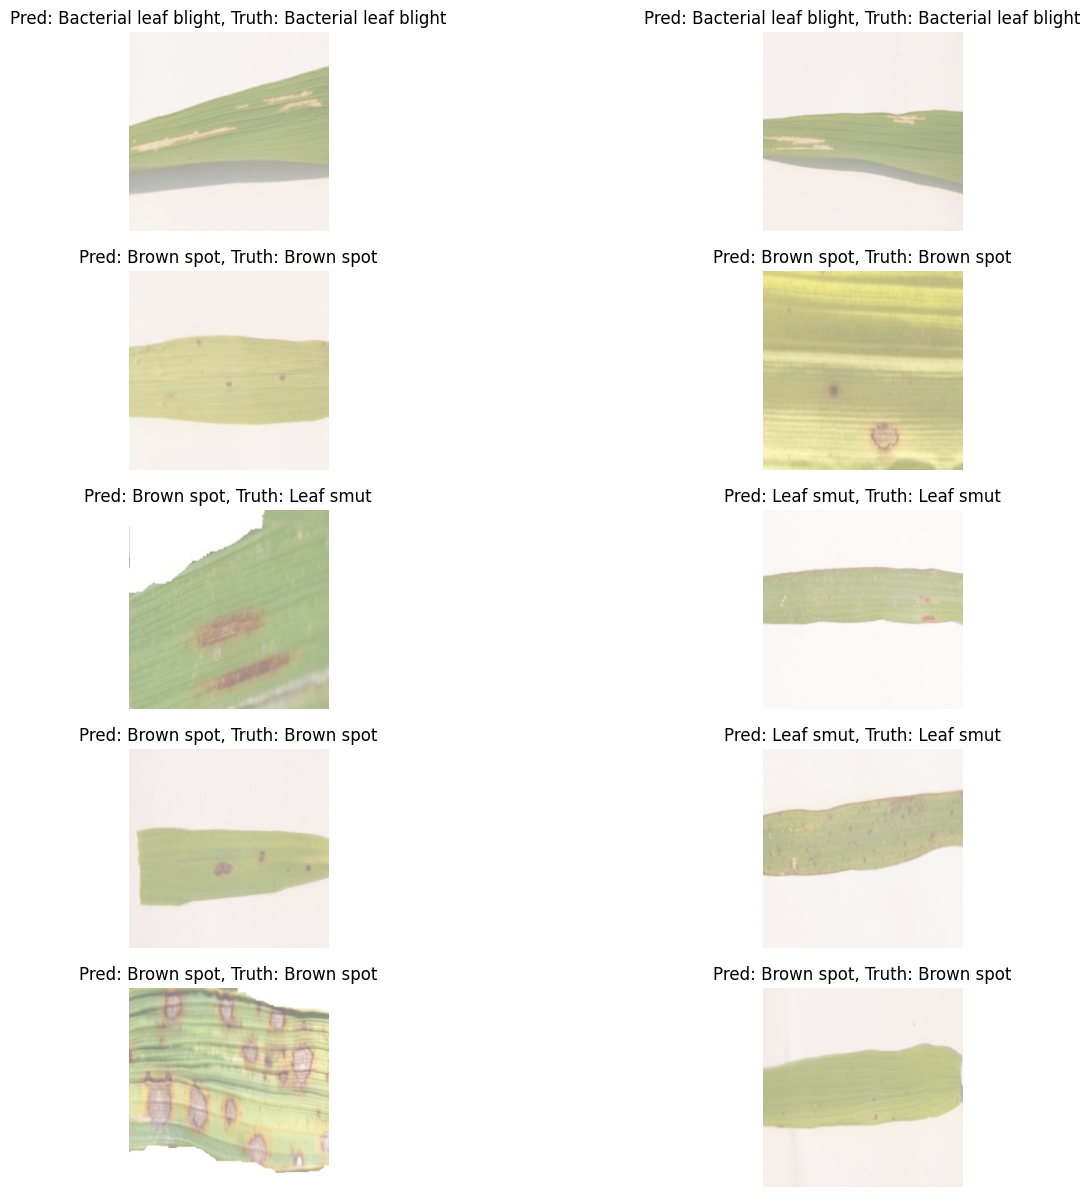

In [14]:
import matplotlib.pyplot as plt
import torch

# Cihazı tanımlama
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

def visualize_predictions(model, test_loader, classes, num_images=5):
    model.eval()
    images_so_far = 0
    fig = plt.figure(figsize=(15, 15))

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(test_loader):
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'Pred: {classes[preds[j]]}, Truth: {classes[labels[j]]}')
                img = inputs.cpu().data[j].numpy().transpose((1, 2, 0))
                img = img * 0.5 + 0.5  # Unnormalize
                plt.imshow(img)

                if images_so_far == num_images:
                    return

# Sınıf isimleri listesi
classes = dataset.classes

# Modelin tahminlerini görselleştir
visualize_predictions(server.model, test_loader, classes, num_images=10)
